# Projet Python IA
## Prédiction de prix de maison (Régression linéaire)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# pour forcer a afficher toutes les colonnes et toutes les lignes
pd.set_option("display.max_rows", 100)


In [3]:
# Chargement de donnée avec l'Id en index
HousePrice = pd.read_csv('./Data/House_price.csv', index_col="Id")

### Exploration de données:

In [4]:
HousePrice.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
HousePrice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
HousePrice.shape

(1460, 80)

In [7]:
HousePrice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Après lecture de la description des données on a jugé que pour le moment plusieurs colonnes peuvent être supprimées::
- MSSubClass : ces données seront présentes dans d'autres colonnes notamment dans MSZoning ou dans Street.
- LotFrontage : nous n'avons pas forcément besoin de la surface linéaire du bien tant que nous avons la surface totale qui est le principal critère.
- LandContour : n'est pas forcément un critère du prix
- LandSlope : même chose que LandContour
- BldgType : le même critère que la surface de la maison 
- HouseStyle : la même chose que ldgType
- Nous avons une colonne qui évalue la qualité du matériel d'extérieur donc nous pouvons supprimer les colonnes :
    - RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea
- Nous avons la surface total sous-sol, sa taille en inch et sa condition générale donc on peut supprimer les colonnes :
    - BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF
- Heating : on a une colonne HeatingQC qui définit qualité et la condition du chauffage 
- 1stFlrSF, 2ndFlrSF nous avons déjà la surface totale de la maison, la surface de chaque étage n'est pas vraiment un critère du prix 
- GarageType, GarageYrBlt, GarageFinish, GarageCars, ces attributs ne sont pas nécessaires vu qu'on a la surface du garage, sa qualité, et sa condition 
- MiscFeature, n'est pas nécessaire, nous avons une evaluations de la qualité des fonctionalités de plus
- MoSold, YrSold, SaleType, SaleCondition n'est pas un critère car nous voulons estimer les prix des maisons avant de les vendre.
- Condition1, Condition2 car nous avons déjà le quartier de la maison.

In [8]:
# nouveau dataframe avec les colonnes dont nous avons besoin
HousePrice1 = HousePrice.drop(['MSSubClass', 'LotFrontage', 'LandContour', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'MiscFeature', 'SaleType', 'SaleCondition', 'MoSold', 'YrSold', 'Condition1', 'Condition2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'], axis=1)

In [9]:
HousePrice1.duplicated().sum()

0

In [10]:
HousePrice1.isnull().sum()

MSZoning            0
LotArea             0
Street              0
Alley            1369
LotShape            0
Utilities           0
LotConfig           0
Neighborhood        0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
LowQualFinSF        0
GrLivArea           0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscVal             0
SalePrice           0
dtype: int64

On remarque qu'il y a des colonnes qui contiennent des valeurs nulles, qui ne sont réellement pas des nuls mais veut dire que cet accessoire ou cette fonctionnalité n'est pas disponible dans la maison, donc on va devoir remplacer ces valeurs nulls par 0.

In [11]:
colToFill = ['Alley', 'PoolQC', 'Fence', 'GarageQual', 'GarageCond', 'FireplaceQu', 'BsmtQual', 'BsmtCond']
HousePrice1[colToFill] = HousePrice1[colToFill].fillna(0)
HousePrice1 = HousePrice1.dropna()


## Analyse de données 


In [12]:
HousePrice1.columns

Index(['MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice'],
      dtype='object')

Nous allons comparer la variation du prix par rapport à quelques critères pour pouvoir définir le degré de leur influence et pouvoir déterminé si nous pouvons supprimer d'autres colonnes ou en rajouter.

In [13]:
def Barplot(df, col):
    df1 = df[['SalePrice', col]]
    mean = df1.groupby(col).mean().sort_values('SalePrice')
    mean['SalePrice'].plot(kind='bar')
    plt.title('Moyenne des prix par ' + col )
    plt.xlabel(col)
    plt.ylabel('Moyenne des prix')
    plt.show()


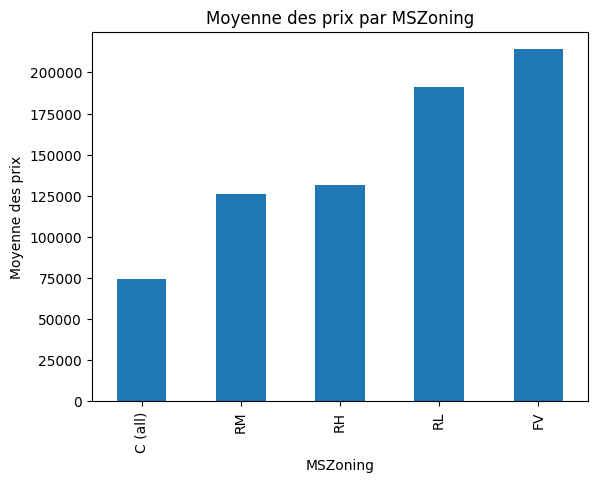

In [14]:
Barplot(HousePrice1, 'MSZoning')

On peut remarquer que la moyenne du prix varie en fonction des zones, donc cette colonne est nécessaire pour le calcul du prix

In [15]:
HousePrice1['SalePrice'].corr(HousePrice1['LotArea'])

0.2638374151805015

On remarque une faible corrélation entre LotArea et HousePrice, nous allons faire un scatter plot pour s'assurer nos résultats.

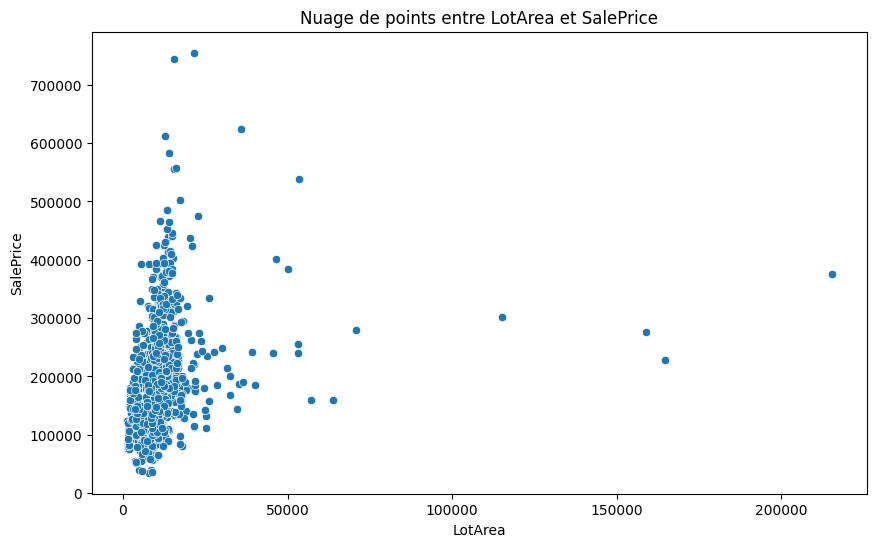

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=HousePrice1)
plt.title('Nuage de points entre LotArea et SalePrice')
plt.show()

Le graph affirme la corrélation, donc nous pouvons supprimer cette colonne

In [17]:
#Supression de la colonne LotArea
HousePrice1 = HousePrice1.drop('LotArea', axis=1)

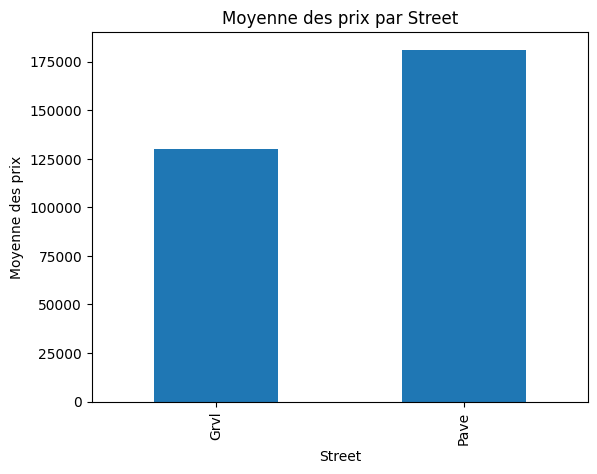

In [18]:
Barplot(HousePrice1, 'Street')

Nous pouvons remarquer la moyenne des prix est plus élevée avec un type de rue Pave, et nous allons donc laisser cette variable pour l'entrainement de notre modèle

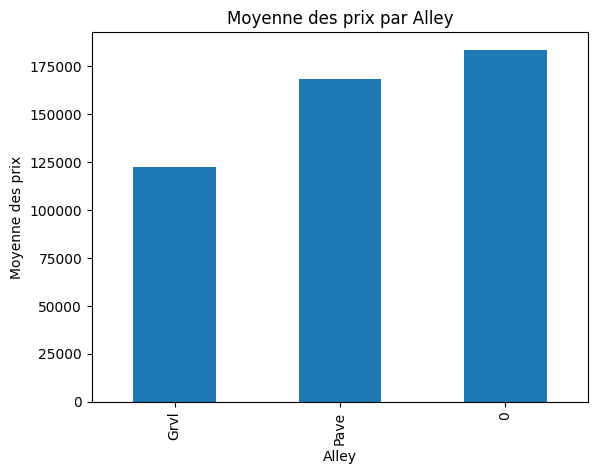

In [19]:
Barplot(HousePrice1, 'Alley')

Nous allons laisser cette colonne, car la moyenne varie en fonction de du type d'Alley

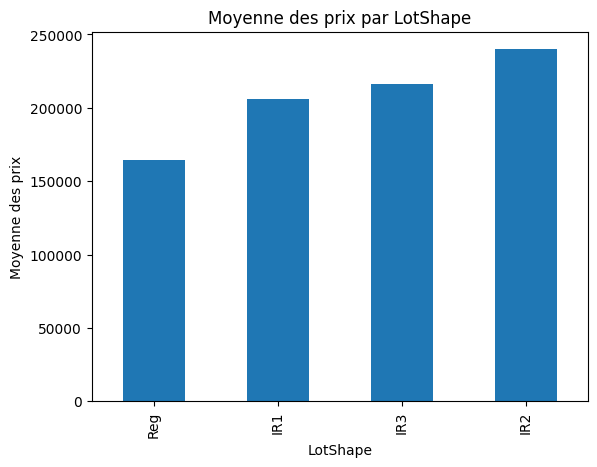

In [20]:
Barplot(HousePrice1, 'LotShape')

Nous allons laisser cette colonne

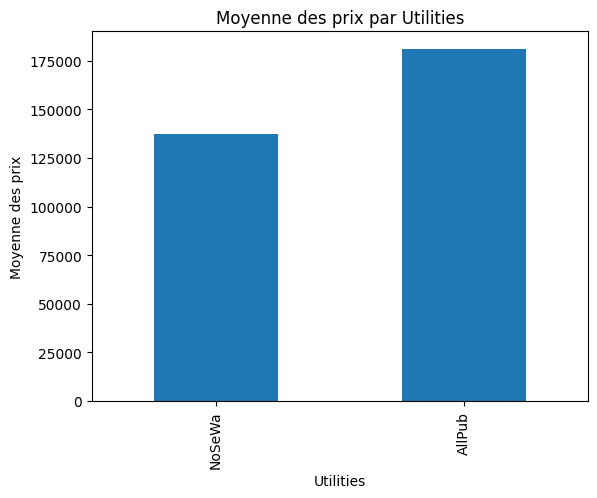

In [21]:
Barplot(HousePrice1, 'Utilities')

Il n'y a pas beaucoup de différences entre les deux moyennes mais le variable reste intéressant.

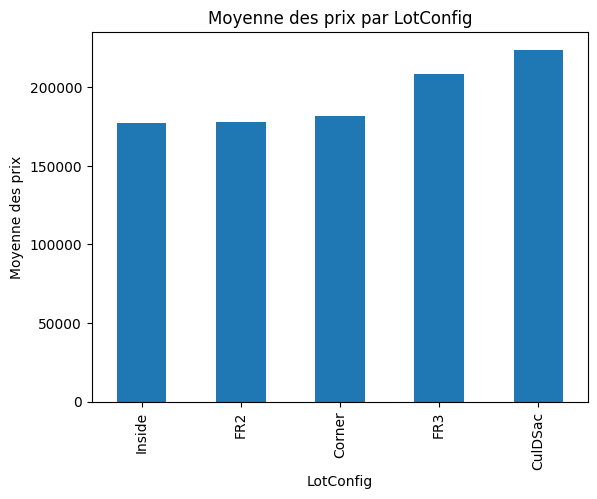

In [22]:
Barplot(HousePrice1, 'LotConfig')

Il n'y a pas beaucoup de différences entre les moyennes, nous pouvons supprimer Lot Config.

In [23]:
HousePrice1 = HousePrice1.drop('LotConfig', axis=1)

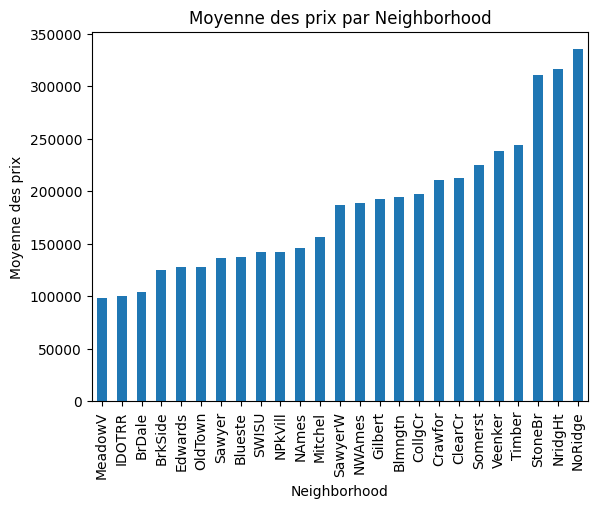

In [24]:
Barplot(HousePrice1, 'Neighborhood')

Nous pouvons remarquer que les prix des maisons n'est pas le même dans tous les quartier, nous laisserons cette variable car elle nous sera nécessaire. 

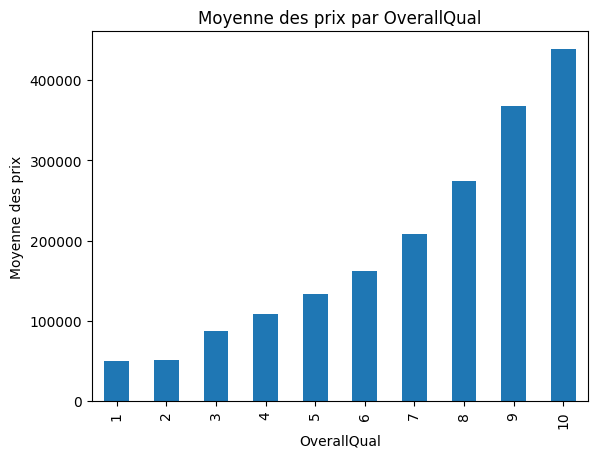

In [25]:
Barplot(HousePrice1, 'OverallQual')

La qualité générale du bien est très importante pour le calcul du prix.

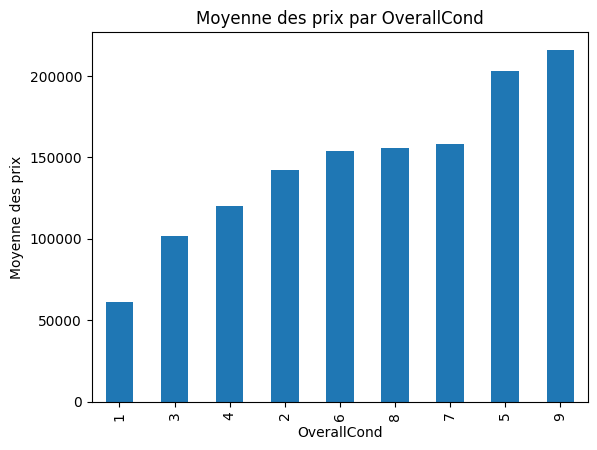

In [26]:
Barplot(HousePrice1, 'OverallCond')

on peut remarquer que ce n'est pas bien ordonné, par exemple la moyenne des prix des maisons dont l'État est 5 est plus élevé que ceux dont l'État est 8;
donc nous allons supprimer cette colonne.

In [27]:
HousePrice1 = HousePrice1.drop('OverallCond', axis=1)

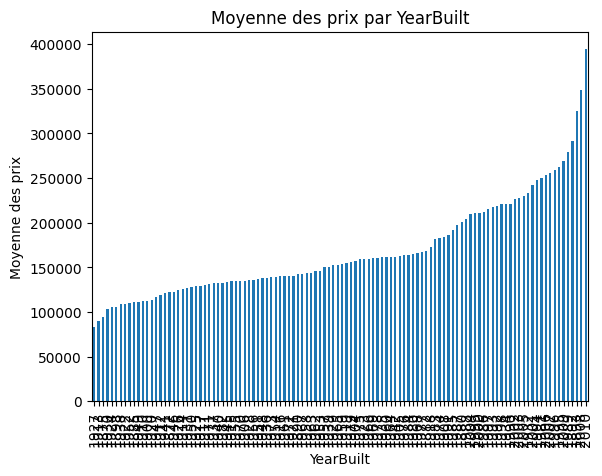

In [28]:
Barplot(HousePrice1, 'YearBuilt')

l'année de construction et un facteur important, on peut voir que plus le bien est récent plus il a de la valeur, nous allons donc laisser cette variable.

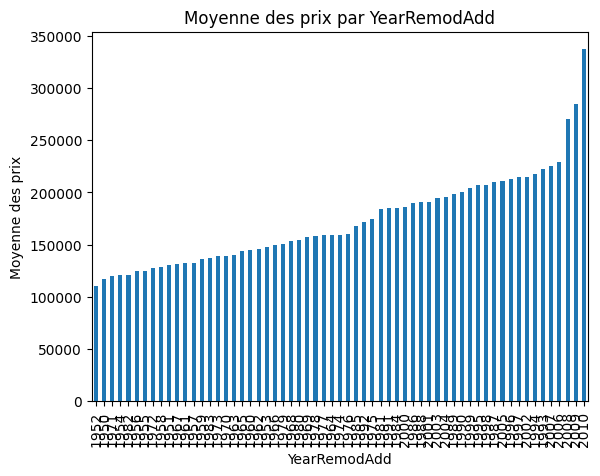

In [29]:
Barplot(HousePrice1, 'YearRemodAdd')

Laisser cette colonne va permettre à notre modèle d'être plus précis car plus l'année de renouvellement est récente plus le prix augmenté, même s'il y a quelques exceptions, par exemple en 1999 la moyenne est plus grande que ceux de 2003, mais c'est normal et ça reste un critère important.

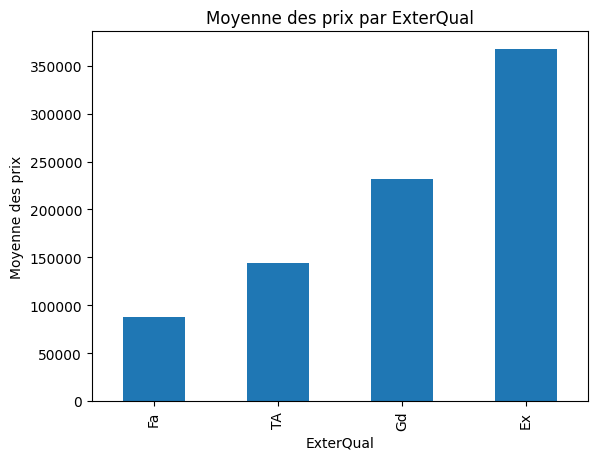

In [30]:
Barplot(HousePrice1, 'ExterQual')

La qualité de l'extérieur est importante, nous pouvons remarquer que plus qualité et bien plus le prix augmente .

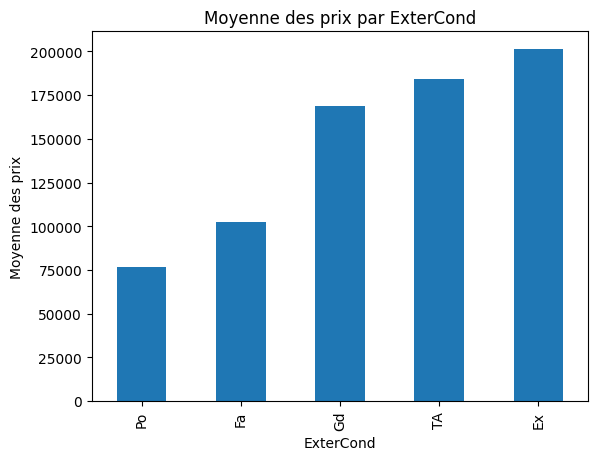

In [31]:
Barplot(HousePrice1, 'ExterCond')

On peut voir que l'augmentation n'est pas bien ordonné, nous allons donc supprimer cette colonn.

In [32]:
HousePrice1 = HousePrice1.drop('ExterCond', axis=1)

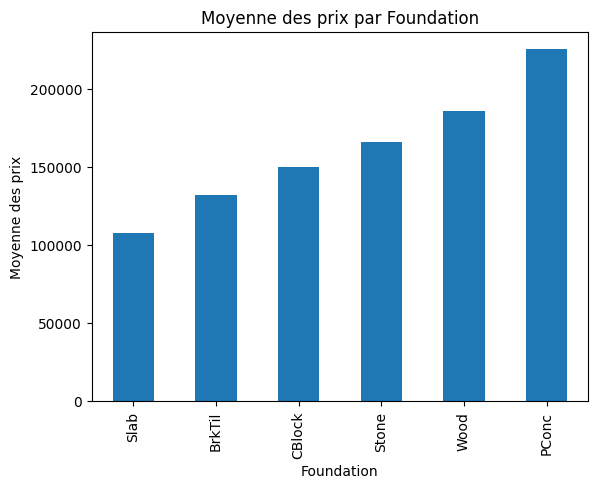

In [33]:
Barplot(HousePrice1, 'Foundation')

Là aussi on peut voir qu'on peut laisser

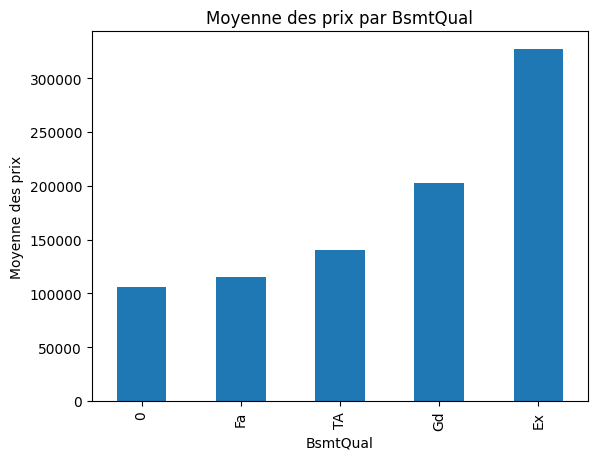

In [34]:
Barplot(HousePrice1, 'BsmtQual')

On laisse cette variable car elle est influente

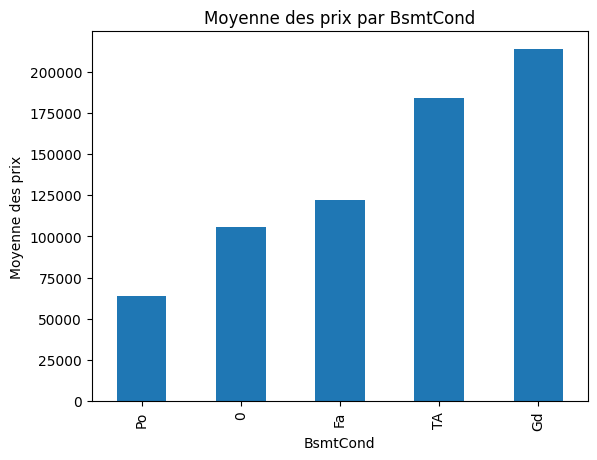

In [35]:
Barplot(HousePrice1, 'BsmtCond')

On laisse cette variable.

In [36]:
HousePrice1['SalePrice'].corr(HousePrice1['TotalBsmtSF'])

0.6139049674835598

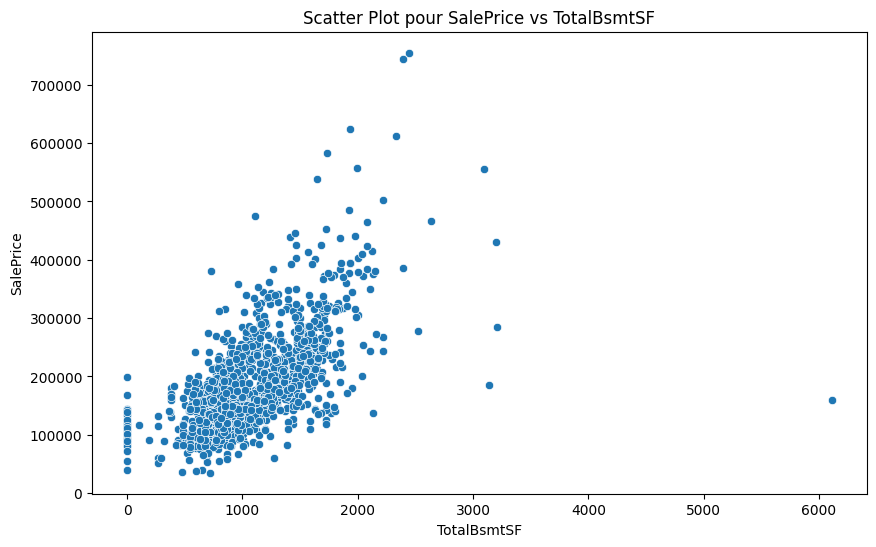

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=HousePrice1['TotalBsmtSF'], y=HousePrice1['SalePrice'])
plt.title('Scatter Plot pour SalePrice vs TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.show()


Nous estimons que la surface de la cave n'a pas une grande influence pas sur le prix, nous allons donc la supprimer.

In [38]:
HousePrice1 = HousePrice1.drop('TotalBsmtSF', axis=1)

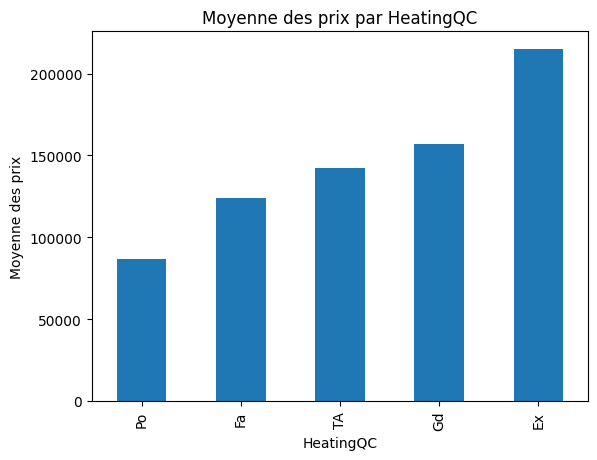

In [39]:
Barplot(HousePrice1, 'HeatingQC')

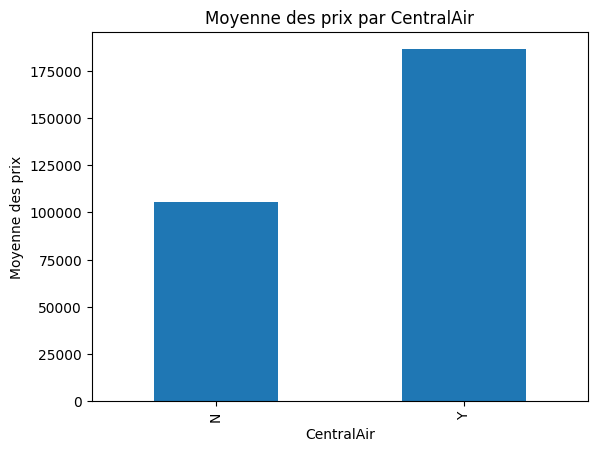

In [40]:
Barplot(HousePrice1, 'CentralAir')

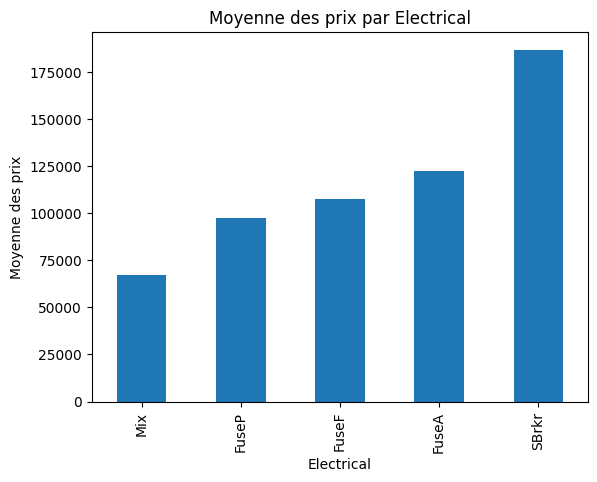

In [41]:
Barplot(HousePrice1, 'Electrical')

In [42]:
HousePrice1['SalePrice'].corr(HousePrice1['LowQualFinSF'])

-0.025620435657683148

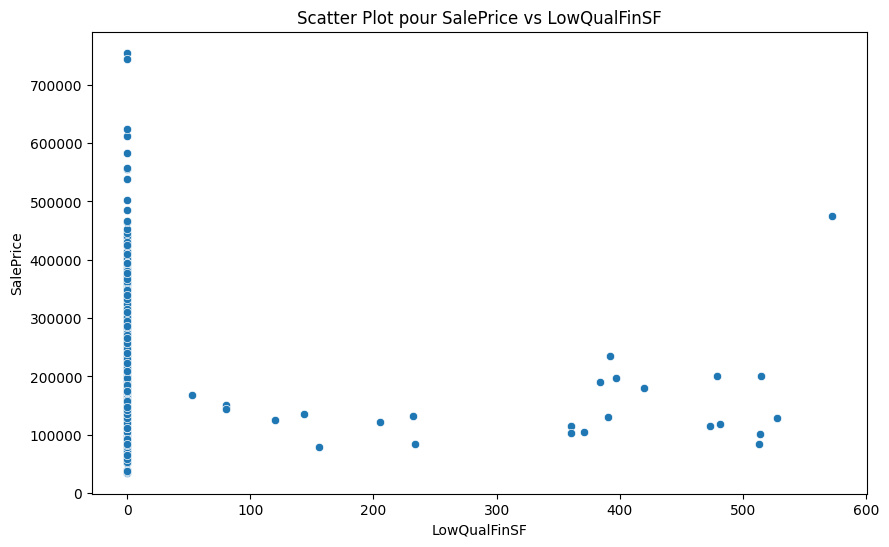

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=HousePrice1['LowQualFinSF'], y=HousePrice1['SalePrice'])
plt.title('Scatter Plot pour SalePrice vs LowQualFinSF')
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')

plt.show()

le résultat de la corrélation et le graph montrent que la variable n'a pas vraiment une influence sur le prix, nous allons donc supprimer la colonne.

In [44]:
HousePrice1 = HousePrice1.drop('LowQualFinSF', axis=1)

In [45]:
HousePrice1['SalePrice'].corr(HousePrice1['GrLivArea'])

0.7086176136783885

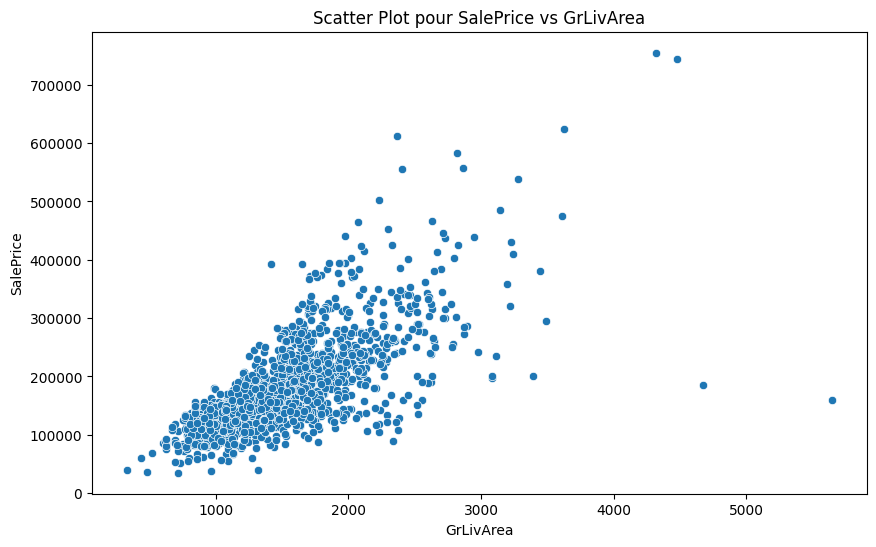

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=HousePrice1['GrLivArea'], y=HousePrice1['SalePrice'])
plt.title('Scatter Plot pour SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.show()

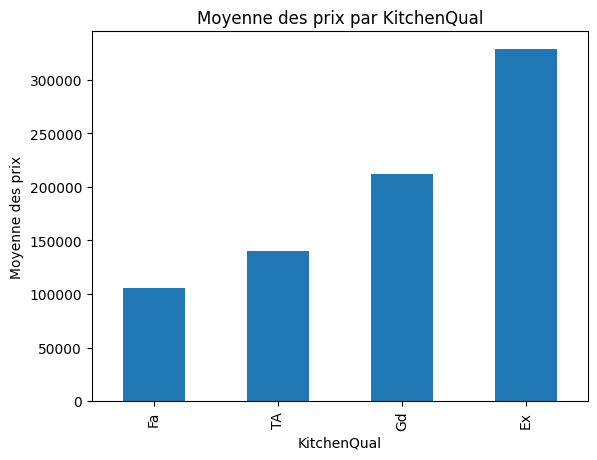

In [47]:
Barplot(HousePrice1, 'KitchenQual')

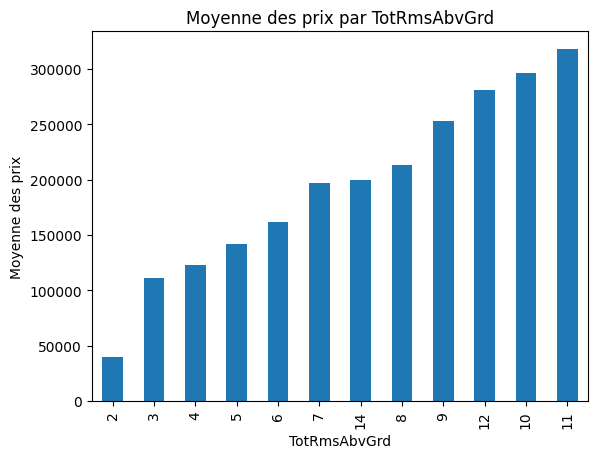

In [48]:
Barplot(HousePrice1, 'TotRmsAbvGrd')

Nous allons supprimer cette variable 

In [49]:
HousePrice1 = HousePrice1.drop('TotRmsAbvGrd', axis=1)

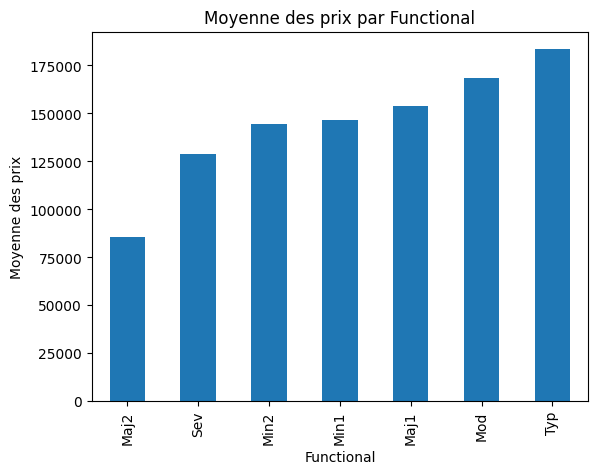

In [50]:
Barplot(HousePrice1, 'Functional')

Il y a certes une différence entre les moyennes, mais Functional n'est pas ordonnée du pire aux meilleures, donc on devra la supprimer.

In [51]:
HousePrice1 = HousePrice1.drop('Functional', axis=1)

In [52]:
HousePrice1['SalePrice'].corr(HousePrice1['Fireplaces'])

0.46696804555163896

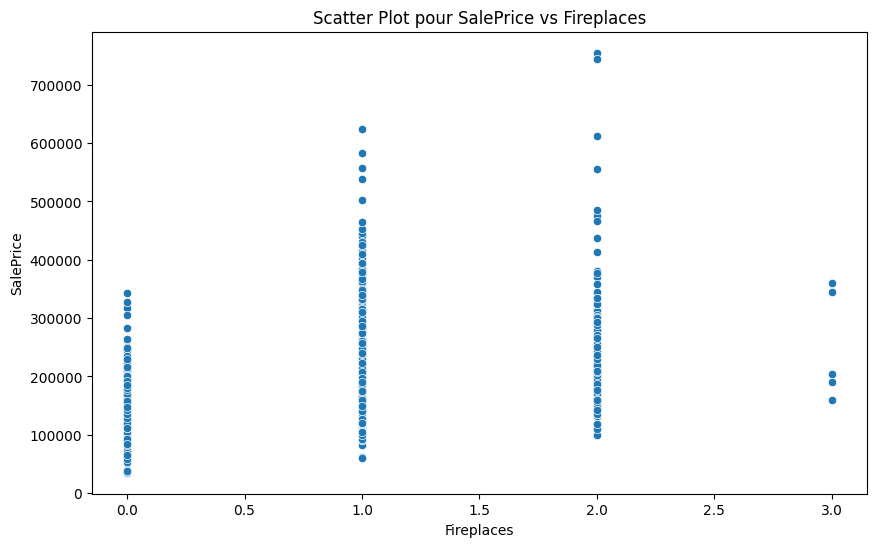

In [53]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=HousePrice1['Fireplaces'], y=HousePrice1['SalePrice'])
plt.title('Scatter Plot pour SalePrice vs Fireplaces')
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')

plt.show()

- il n'y a pas de corrélation entre les deux variables.

In [54]:
HousePrice1 = HousePrice1.drop('Fireplaces', axis=1)

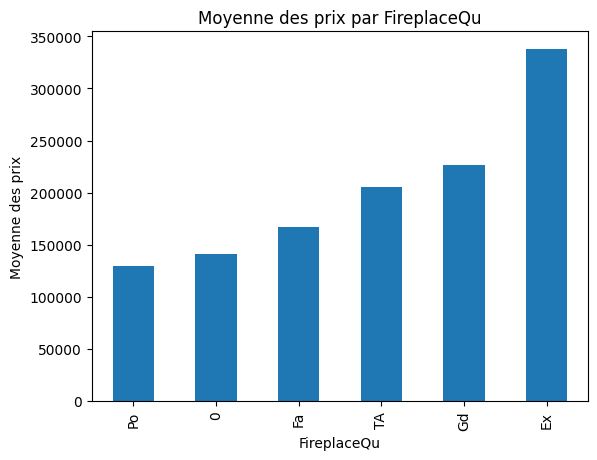

In [55]:
Barplot(HousePrice1, 'FireplaceQu')

In [56]:
HousePrice1['SalePrice'].corr(HousePrice1['GarageArea'])

0.6234228990077114

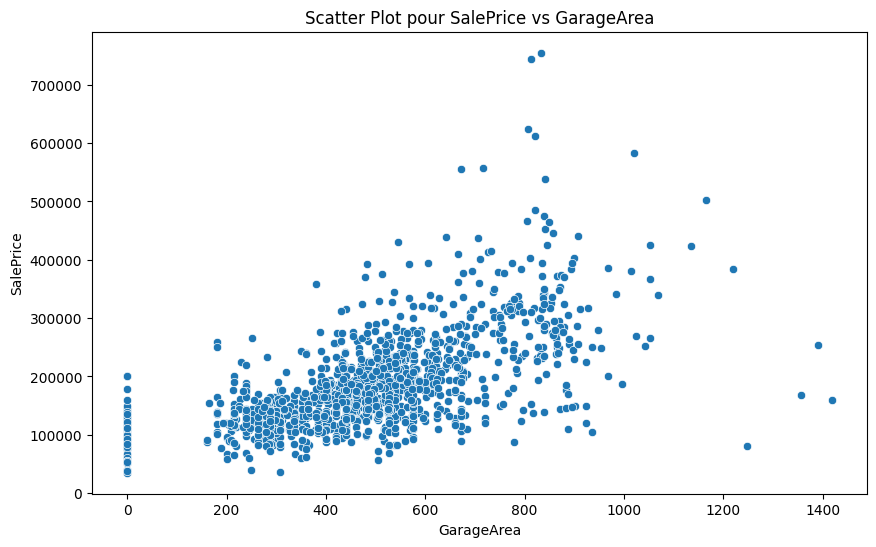

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=HousePrice1['GarageArea'], y=HousePrice1['SalePrice'])
plt.title('Scatter Plot pour SalePrice vs GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.show()

In [58]:
HousePrice1 = HousePrice1.drop('GarageArea', axis=1)

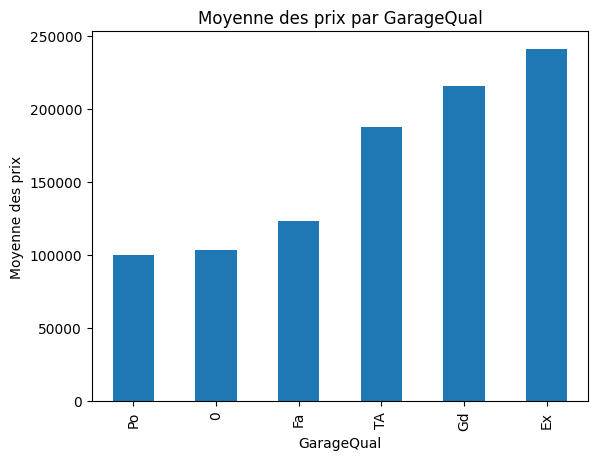

In [59]:
Barplot(HousePrice1, 'GarageQual')

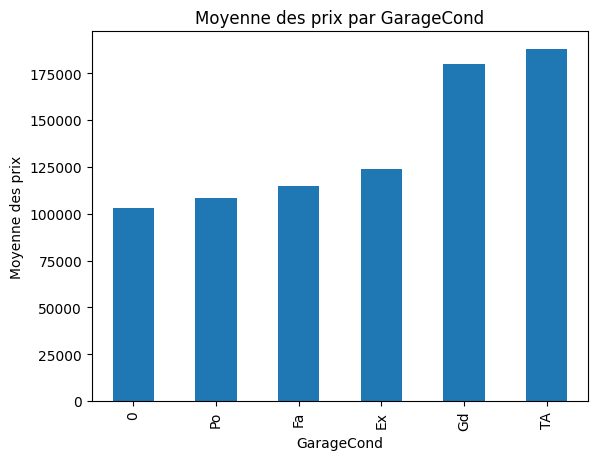

In [60]:
Barplot(HousePrice1, 'GarageCond')

- Nous allons supprimer cette colonne car l'évolution n'est pas ordonnée, on voit dans le graph que la plus grande moyenne est celle dont d'état du garage est moyenne.

In [61]:
HousePrice1 = HousePrice1.drop('GarageCond', axis=1)

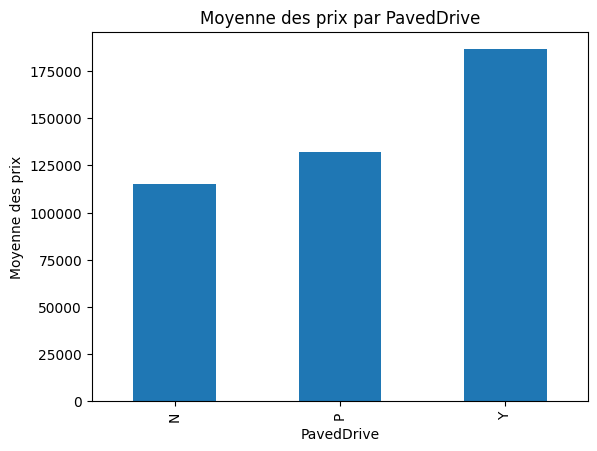

In [62]:
Barplot(HousePrice1, 'PavedDrive')

- Variable a laisser 

- Pour ces variables : 'SalePrice', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch' , nous allons créer une matrice de corrélations afin de comparer et de voir lesquelles on enlèvera.

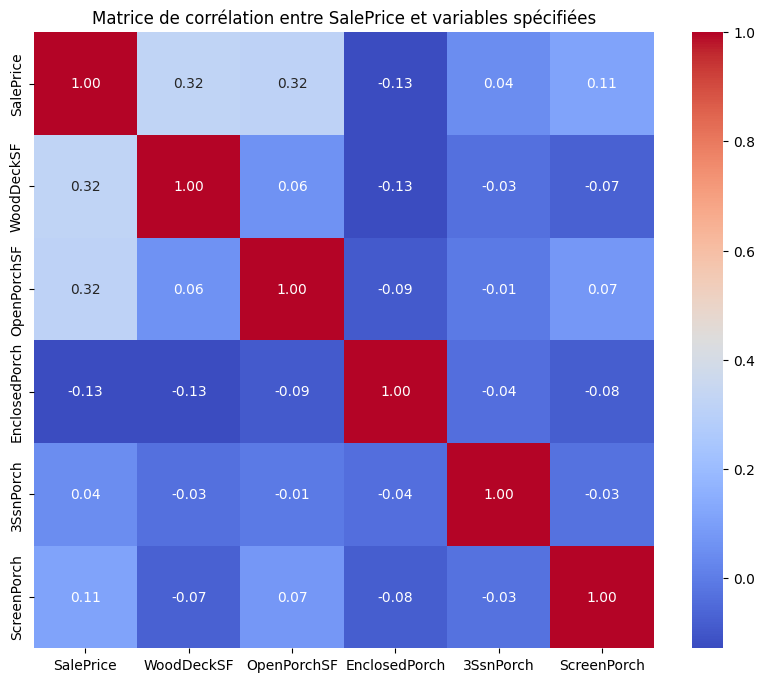

In [63]:
corr = ['SalePrice', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
data = HousePrice1[corr]

matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation entre SalePrice et variables spécifiées')
plt.show()

- On peut supprimer toutes ces variables vu qu'aucune a une corrélation avec le prix.

In [64]:
HousePrice1 = HousePrice1.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

In [65]:
HousePrice1['SalePrice'].corr(HousePrice1['PoolArea'])


0.09239664651115574

In [66]:
HousePrice1 = HousePrice1.drop('PoolArea', axis=1)

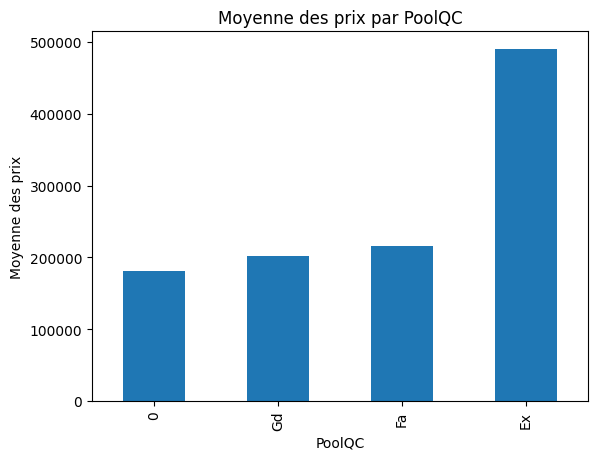

In [67]:
Barplot(HousePrice1, 'PoolQC')

In [68]:
HousePrice1 = HousePrice1.drop('PoolQC', axis=1)

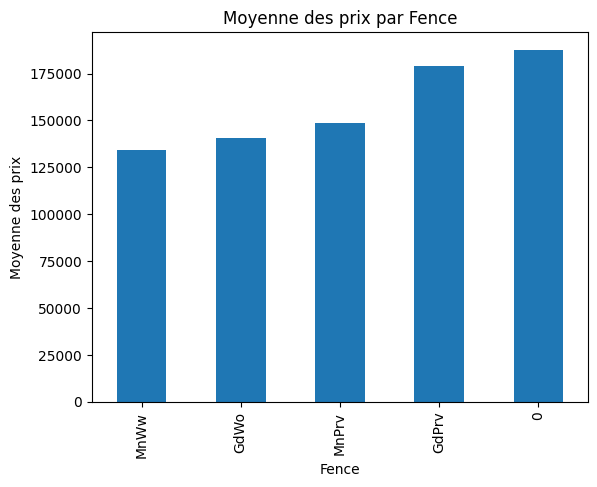

In [69]:
Barplot(HousePrice1, 'Fence')

- Il n'a pas une relation entre le prix et le type de grillage, nous allons donc supprimer.

In [70]:
HousePrice1 = HousePrice1.drop('Fence', axis=1)

In [71]:
HousePrice1['SalePrice'].corr(HousePrice1['MiscVal'])

-0.021200000137796094

In [72]:
HousePrice1 = HousePrice1.drop('MiscVal', axis=1)

## Préparation de données pour le machine learning

- Séparation des variables. 

In [73]:
#séparation
X = HousePrice1[['MSZoning', 'Street', 'Alley', 'LotShape', 'Utilities', 'Neighborhood',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'Electrical',
       'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PavedDrive']]
Y = HousePrice1['SalePrice']

- Scaling des données numériques

In [74]:
from sklearn.preprocessing import StandardScaler

var_num = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[var_num] = scaler.fit_transform(X[var_num])

/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/4252720507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var_num] = scaler.fit_transform(X[var_num])


- Encodage des variables binaires

In [75]:
#Encodage des variables binaires
X['CentralAir'] = X['CentralAir'].apply(lambda row: 1 if row == 'Y' else 0)
X['Street'] = X['Street'].apply(lambda row: 1 if row == 'Pave' else 0)

/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/3432804704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CentralAir'] = X['CentralAir'].apply(lambda row: 1 if row == 'Y' else 0)
/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/3432804704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Street'] = X['Street'].apply(lambda row: 1 if row == 'Pave' else 0)


- Encodage des variables ordinal

In [76]:
from sklearn.preprocessing import OrdinalEncoder
categ_ord = ['ExterQual', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PavedDrive']
X[categ_ord] = X[categ_ord].replace(0, 'N')
ordinal_encoder = OrdinalEncoder()
X[categ_ord] = ordinal_encoder.fit_transform(X[categ_ord])

/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/1384529402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categ_ord] = X[categ_ord].replace(0, 'N')
/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/1384529402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categ_ord] = ordinal_encoder.fit_transform(X[categ_ord])


- Encodage des variable non ordinal

In [77]:
from sklearn.preprocessing import LabelEncoder
categ_nonOrd = ['MSZoning', 'Street', 'Alley','LotShape', 'Utilities', 'Neighborhood', 'Foundation', 'CentralAir', 'Electrical']
X[categ_nonOrd] = X[categ_nonOrd].astype(str)
label_encoder = LabelEncoder()
X[categ_nonOrd] = X[categ_nonOrd].apply(LabelEncoder().fit_transform)

/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/578926852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categ_nonOrd] = X[categ_nonOrd].astype(str)
/var/folders/j2/b8lvvthn0yd5yhj5gb55h6rc0000gn/T/ipykernel_27379/578926852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categ_nonOrd] = X[categ_nonOrd].apply(LabelEncoder().fit_transform)


In [78]:
X.head(1)

,MSZoning,Street,Alley,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,...,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,FireplaceQu,GarageQual,PavedDrive
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,0,3,0,5,0.650852,1.051899,0.879449,2.0,...,2.0,4.0,0.0,1,4,0.370055,2.0,3.0,5.0,2.0


- Séparer les données en deux en deux sous-ensembles 75%-25% pour l'entraînement et le test du modèle de machine learning avec la methode train_test_split de sklearn.

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

## Entraînement du modèle en regression linéaire

In [80]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

## Evaluation du modèle

In [81]:
from sklearn.metrics import r2_score

predictions1 = model1.predict(X_test)
model_score = r2_score(predictions1, Y_test)
print(f"Votre modèle est précis {str(round(model_score,2)*100)} %")

Votre modèle est précis 80.0 %


In [82]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor()
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_test)
model_score2 = r2_score(predictions2, Y_test)
print(f"Votre modèle est précis {str(round(model_score2,2)*100)} %")

Votre modèle est précis 83.0 %
